In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
folder = 'Baza_zdjec_przerobiona/s'
folder_docelowy = '../../Dane/Baza_zdjec_zlaczone_2/'
slesh = '/'
png = '.png'

In [4]:
#Tablica przechowująca zdjęcia osób
people = []
for i in range(1,41):
    images = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)

In [5]:
#Laczna ilosc zdjec
lacznie = 25200

ilosc = 40
rozmiar = 10
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab = np.zeros(lacznie, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(ilosc):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                con = np.concatenate((people[i][j+l], people[i][9-k+l]), axis=1)
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(con)
                con.save(folder_docelowy+str(n)+png) 
      
                poloczone.append(con)
                tab[n] = 1
                n = n + 1
                


In [6]:
x = 0 #Zamiast n 

polaczone = n
m = 41
rozne = []


for i in range(40):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
                con = np.concatenate((people[i][10*rand_1+j], people[i+k][10*rand_2+l]), axis=1)
                con = Image.fromarray(con)
                x = x + 1
                rozne.append(con)
print(x)


78000


In [7]:
for i in range(lacznie - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(folder_docelowy+str(n)+png) 
    
    poloczone.append(con)
    
    tab[n] = 0
    n = n + 1
    
    
    

In [8]:
print(n)

25200


In [9]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+'nowe.csv', sep = ' ')   

0


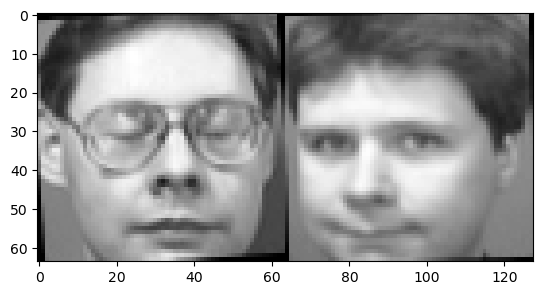

In [11]:
a = 24000
plt.imshow(poloczone[a], cmap = 'gray')
print(tab[a])

In [12]:


#Czytanie z pliku CSV i zapis do tablicy

with open('../../Dane/Baza_zdjec_1/nowe.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value = []
for i in new[0]:
    value.append(int(i))    
    
print(len(value))
print(value[1799])


2000
1
